In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [20, 10]

## Train_users dataset

In [2]:
raw_user = pd.read_csv('./data/train_users_2.csv')

In [3]:
raw_user.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [4]:
raw_user.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp_first_active,213451.0,2.013085e+13,9.253717e+09,2.009032e+13,2.012123e+13,2.013091e+13,2.014031e+13,2.014063e+13
age,125461.0,4.966834e+01,1.556666e+02,1.000000e+00,2.800000e+01,3.400000e+01,4.300000e+01,2.014000e+03
signup_flow,213451.0,3.267387e+00,7.637707e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+01


In [5]:
# ages vs date of birth
raw_user.age.isna().sum()
raw_user.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

## Session dataset

In [6]:
raw_session = pd.read_csv('./data/sessions.csv')
raw_session.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [7]:
raw_session.action_detail.value_counts()

view_search_results               1776885
p3                                1376550
-unknown-                         1031141
wishlist_content_update            706824
user_profile                       656839
change_trip_characteristics        487744
similar_listings                   364624
user_social_connections            336799
update_listing                     269779
listing_reviews                    269021
dashboard                          152952
user_wishlists                     152672
header_userpic                     141830
message_thread                     132395
edit_profile                       108686
message_post                        87103
contact_host                        81041
unavailable_dates                   77795
confirm_email_link                  58422
create_user                         54878
change_contact_host_dates           52517
user_profile_content_update         50434
user_reviews                        49665
p5                                

In [8]:
raw_session.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

## Countries dataset

In [9]:
raw_countries = pd.read_csv('./data/countries.csv')

In [10]:
raw_countries.head(10)

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [11]:
raw_countries.shape

(10, 7)

In [12]:
raw_countries.describe().T

,count,mean,std,min,25%,50%,75%,max
lat_destination,10.0,3.979940e+01,2.473911e+01,-26.853388,39.639090,44.053092,5.189122e+01,6.239330e+01
lng_destination,10.0,-4.262446e+00,6.370058e+01,-96.818146,-6.737559,-0.139014,9.163386e+00,1.332752e+02
distance_km,10.0,7.181898e+03,3.941142e+03,0.000000,7001.557600,7603.632650,7.842357e+03,1.529774e+04
destination_km2,10.0,2.973734e+06,4.329619e+06,41543.000000,258042.500000,431196.000000,5.966865e+06,9.984670e+06
language_levenshtein_distance,10.0,5.049900e+01,4.454169e+01,0.000000,0.000000,67.915000,9.139500e+01,9.545000e+01


In [13]:
raw_countries.sort_values('distance_km', inplace=True)

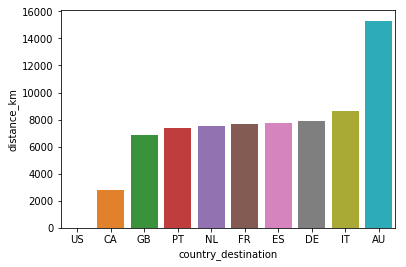

In [14]:
sns.barplot(x='country_destination', y='distance_km', data=raw_countries)

## Age gender bkts dataset

In [15]:
raw_age_gender_bkts = pd.read_csv('./data/age_gender_bkts.csv')

In [16]:
raw_age_gender_bkts.head(10)

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
5,75-79,AU,male,298.0,2015.0
6,70-74,AU,male,415.0,2015.0
7,65-69,AU,male,574.0,2015.0
8,60-64,AU,male,636.0,2015.0
9,55-59,AU,male,714.0,2015.0


In [17]:
raw_age_gender_bkts.shape

(420, 5)

In [18]:
raw_age_gender_bkts.columns

Index(['age_bucket', 'country_destination', 'gender',
       'population_in_thousands', 'year'],
      dtype='object')

In [19]:
raw_age_gender_bkts.describe().T

,count,mean,std,min,25%,50%,75%,max
population_in_thousands,420.0,1743.133333,2509.843202,0.0,396.5,1090.5,1968.0,11601.0
year,420.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0


In [20]:
raw_age_gender_bkts['age_bucket'] = raw_age_gender_bkts['age_bucket'].str.strip()
raw_age_gender_bkts['age_bucket'].unique()
# age_range = raw_age_gender_bkts['age_bucket'].unique()

raw_age_gender_bkts['age_bucket_range'] = raw_age_gender_bkts['age_bucket'].str.split('-').apply(lambda x: int(str.strip(x[0], '+')))

<Figure size 720x360 with 0 Axes>

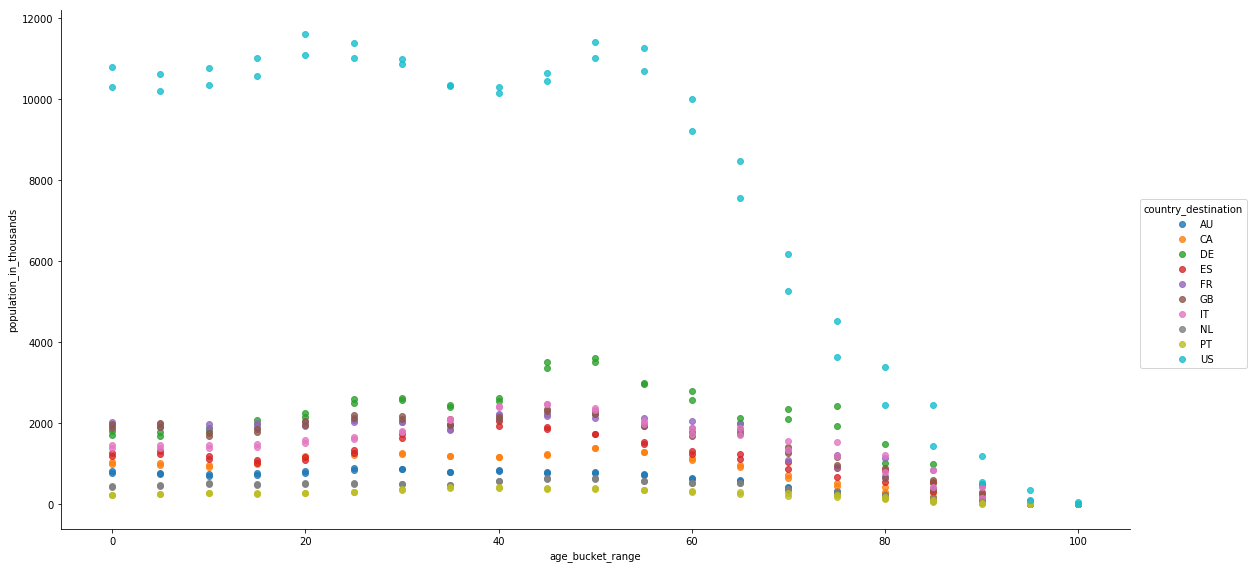

In [21]:
plt.figure(figsize=(10, 5))
sns.lmplot(x='age_bucket_range', y='population_in_thousands', data=raw_age_gender_bkts, hue='country_destination', aspect=2, size=8, fit_reg=False)

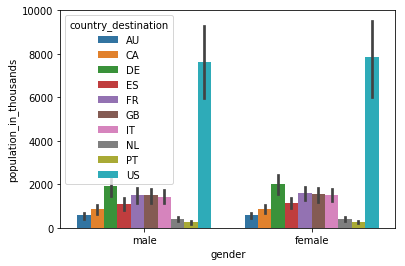

In [22]:
sns.barplot(x='gender', y='population_in_thousands', data=raw_age_gender_bkts, hue='country_destination')

In [23]:
raw_test_dataset = pd.read_csv('./data/test_users.csv')
raw_test_dataset.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
5,szx28ujmhf,2014-07-01,20140701000336,NaN,FEMALE,28.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome
6,guenkfjcbq,2014-07-01,20140701000514,NaN,MALE,48.0,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-
7,tkpq0mlugk,2014-07-01,20140701000649,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
8,3xtgd5p9dn,2014-07-01,20140701000837,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
9,md9aj22l5a,2014-07-01,20140701002245,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,Windows Desktop,Firefox


In [24]:
# raw_session.loc[raw_session['user_id'] == raw_test_dataset['id'][2], :]

# Preprocess train data

In [25]:
raw_user.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [26]:
raw_test_dataset.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')

In [27]:
raw_user_datetime = raw_user.loc[:, ['date_account_created', 'timestamp_first_active' , 'country_destination']]

In [28]:
from datetime import datetime
# datetime format yyyy-mm-dd
func_str_datetime = lambda x: datetime.strptime(x, '%Y-%m-%d')
func_str_datetime_2 = lambda x: datetime.strptime(str(x), '%Y%m%d%H%M%S')
raw_user_datetime['date_account_created'] = raw_user_datetime['date_account_created'].apply(func_str_datetime)
raw_user_datetime['timestamp_first_active'] = raw_user_datetime['timestamp_first_active'].apply(func_str_datetime_2)

In [29]:
raw_user_datetime.head(10)

,date_account_created,timestamp_first_active,country_destination
0,2010-06-28,2009-03-19 04:32:55,NDF
1,2011-05-25,2009-05-23 17:48:09,NDF
2,2010-09-28,2009-06-09 23:12:47,US
3,2011-12-05,2009-10-31 06:01:29,other
4,2010-09-14,2009-12-08 06:11:05,US
5,2010-01-01,2010-01-01 21:56:19,US
6,2010-01-02,2010-01-02 01:25:58,US
7,2010-01-03,2010-01-03 19:19:05,US
8,2010-01-04,2010-01-04 00:42:11,US
9,2010-01-04,2010-01-04 02:37:58,US


In [30]:
raw_user_datetime['delta_time'] = raw_user_datetime.loc[:, 'date_account_created'].dt.date - raw_user_datetime.loc[:, 'timestamp_first_active'].dt.date

In [31]:
raw_user_datetime.describe().T

,count,mean,std,min,25%,50%,75%,max
delta_time,213451,0 days 05:33:49.162664,11 days 22:45:41.307539,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1456 days 00:00:00


In [32]:
raw_user_datetime.sort_values('delta_time', ascending=False).head(10)

,date_account_created,timestamp_first_active,country_destination,delta_time
710,2014-05-23,2010-05-28 14:06:42,NDF,1456 days
422,2014-01-15,2010-04-17 17:26:59,US,1369 days
1025,2014-04-03,2010-07-12 21:29:24,NDF,1361 days
4485,2014-06-17,2011-04-26 23:20:29,US,1148 days
4180,2014-02-11,2011-04-12 02:54:20,US,1036 days
7666,2014-05-29,2011-08-15 22:54:48,NDF,1018 days
4434,2014-01-29,2011-04-24 11:19:01,ES,1011 days
2817,2013-09-26,2011-01-02 23:50:14,NDF,998 days
2537,2013-08-22,2010-12-01 14:30:12,US,995 days
15393,2014-06-17,2012-01-17 19:04:02,US,882 days


In [33]:
raw_user_datetime['delta_time'].dt.days.head()

0    466
1    732
2    476
3    765
4    280
Name: delta_time, dtype: int64

In [34]:
raw_user_datetime.head(10)

,date_account_created,timestamp_first_active,country_destination,delta_time
0,2010-06-28,2009-03-19 04:32:55,NDF,466 days
1,2011-05-25,2009-05-23 17:48:09,NDF,732 days
2,2010-09-28,2009-06-09 23:12:47,US,476 days
3,2011-12-05,2009-10-31 06:01:29,other,765 days
4,2010-09-14,2009-12-08 06:11:05,US,280 days
5,2010-01-01,2010-01-01 21:56:19,US,0 days
6,2010-01-02,2010-01-02 01:25:58,US,0 days
7,2010-01-03,2010-01-03 19:19:05,US,0 days
8,2010-01-04,2010-01-04 00:42:11,US,0 days
9,2010-01-04,2010-01-04 02:37:58,US,0 days


In [35]:
raw_user_datetime.delta_time.value_counts()
raw_user_datetime.delta_time.nunique()

143

In [36]:
crosstab = pd.crosstab(raw_user_datetime['delta_time'].dt.days, raw_user_datetime['country_destination'])[1:]

In [37]:
crosstab.head(10)
# sns.tsplot(crosstab, value='NDF')

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
delta_time,,,,,,,,,,,,
1,0,1,0,0,0,0,0,2,0,0,3,1
2,0,0,0,0,0,0,0,3,0,0,0,1
3,0,0,0,0,0,0,2,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,2,0
5,0,0,0,0,0,1,0,1,1,0,0,0
6,0,0,0,0,0,1,0,0,0,0,3,0
7,0,0,0,0,1,0,0,2,0,0,1,0
9,0,0,0,0,0,0,0,1,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
crosstab.sum()

country_destination
AU        1
CA        3
DE        3
ES        3
FR        4
GB        7
IT        4
NDF      54
NL        1
PT        0
US       89
other     9
dtype: int64

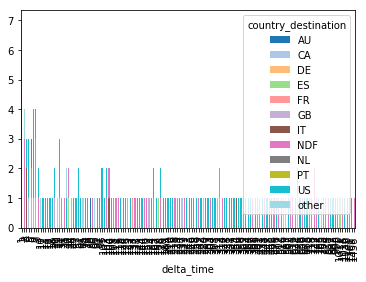

In [39]:
crosstab.plot(kind='bar', stacked=True, colormap='tab20')

In [40]:
crosstab_stacked = crosstab.stack().reset_index().rename(columns={0:'value'})
crosstab_stacked.head()

,delta_time,country_destination,value
0,1,AU,0
1,1,CA,1
2,1,DE,0
3,1,ES,0
4,1,FR,0


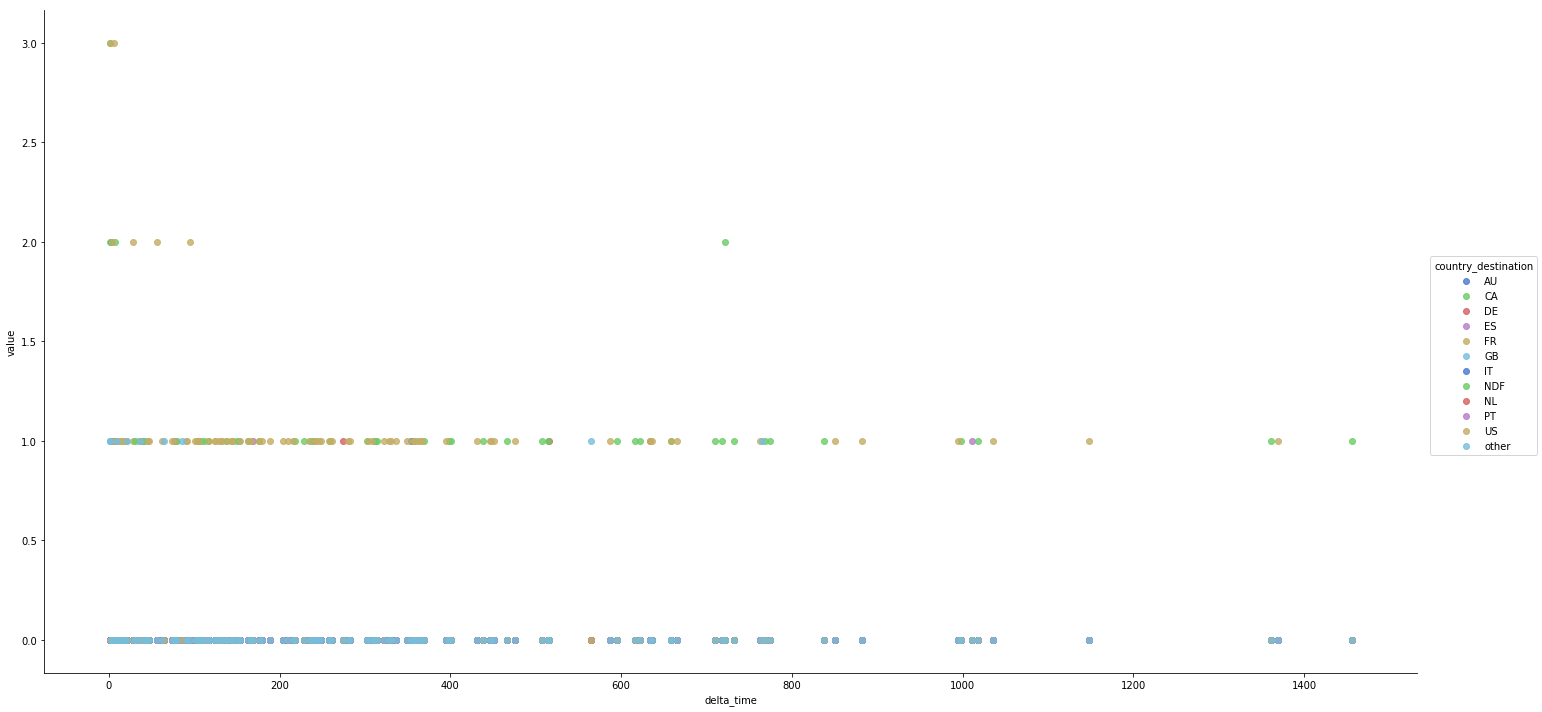

In [41]:
sns.lmplot(x='delta_time', y='value', data=crosstab_stacked, hue='country_destination' ,fit_reg=False, aspect=2, size= 10, palette="muted")

In [42]:
crosstab.reset_index().head()

country_destination,delta_time,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
0,1,0,1,0,0,0,0,0,2,0,0,3,1
1,2,0,0,0,0,0,0,0,3,0,0,0,1
2,3,0,0,0,0,0,0,2,0,0,0,1,0
3,4,0,1,0,0,0,0,0,0,0,0,2,0
4,5,0,0,0,0,0,1,0,1,1,0,0,0


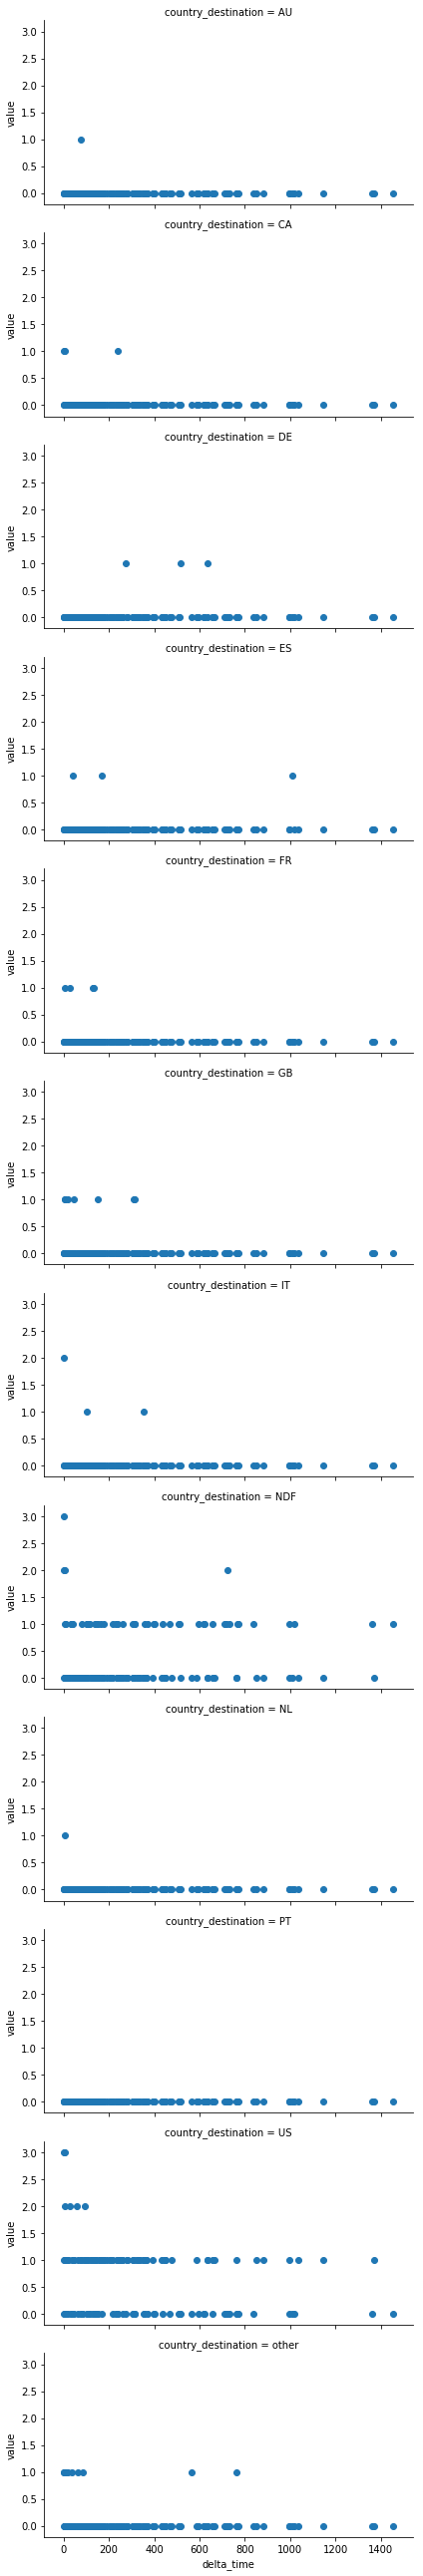

In [43]:
g = sns.FacetGrid(crosstab_stacked, row='country_destination', aspect=2)
g.map(plt.scatter, 'delta_time', 'value')

### signup_flow vs country_destination

In [44]:
raw_user.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [45]:
raw_user.signup_flow.value_counts()

0     164739
25     14659
12      9329
3       8822
2       6881
24      4328
23      2835
1       1047
6        301
8        240
21       196
5         36
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

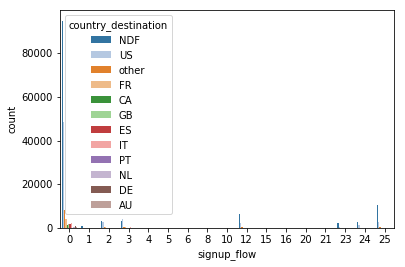

In [46]:
sns.countplot(x='signup_flow', data=raw_user, hue='country_destination', palette='tab20')

### language vs country_destination

In [47]:
raw_user.language.value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
is         5
ca         5
hr         2
Name: language, dtype: int64

In [48]:
portion_user = raw_user.sample(1000)
# lang_crosstab = pd.crosstab(raw_user.language, raw_user.country_destination)
lang_crosstab = pd.crosstab(portion_user.language, portion_user.country_destination)
lang_crosstab.head(10)

country_destination,AU,CA,DE,ES,FR,GB,IT,NDF,NL,PT,US,other
language,,,,,,,,,,,,
de,1,0,0,0,0,0,0,2,0,0,1,1
el,0,0,0,0,0,0,0,1,0,0,0,0
en,2,6,4,7,37,7,9,560,2,0,287,40
es,0,0,0,1,0,0,0,3,0,1,0,0
fr,0,0,0,1,0,0,0,6,0,0,0,0
it,0,0,0,0,0,0,0,0,0,0,1,0
ja,0,1,0,0,0,0,0,0,0,0,2,0
ko,0,0,0,0,0,0,0,4,0,0,0,1
nl,0,0,0,0,0,0,0,0,0,0,1,0


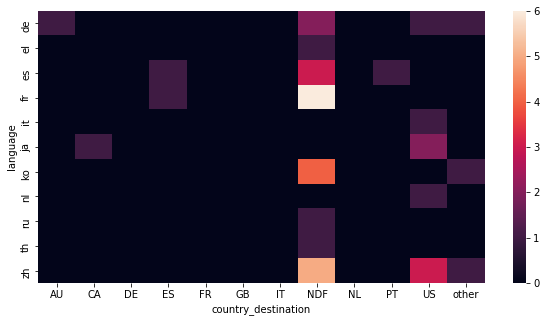

In [49]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(lang_crosstab.drop(axis=0, index='en'), ax=ax)

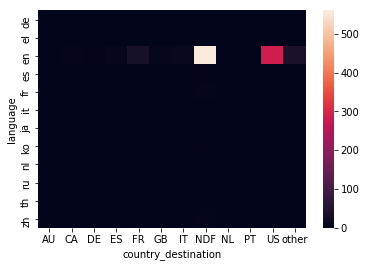

In [50]:
sns.heatmap(lang_crosstab)

### 'affiliate_channel', 'affiliate_provider','first_affiliate_tracked',

In [51]:
raw_user.affiliate_channel.value_counts()
raw_user.affiliate_channel.isna().any()
raw_user.affiliate_channel.isnull().any()
raw_user.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

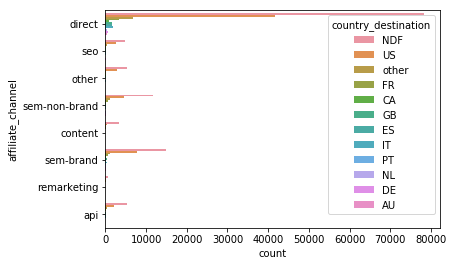

In [52]:
sns.countplot(y='affiliate_channel', data=raw_user, hue='country_destination')

### 'signup_app', 'first_device_type', 'first_browser',

In [53]:
raw_user.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [54]:
raw_test_dataset.signup_method.unique()

array(['facebook', 'basic', 'google', 'weibo'], dtype=object)

In [63]:
# year - year
mean_age = raw_user[raw_user.age < 120].age.mean()
age_func = lambda x: 2014 - x if x > 150 else mean_age if x > 100 and x <= 150 else x

In [64]:
raw_user.age.map(age_func).describe()

count    125461.000000
mean         36.346283
std          11.952566
min           0.000000
25%          28.000000
50%          34.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

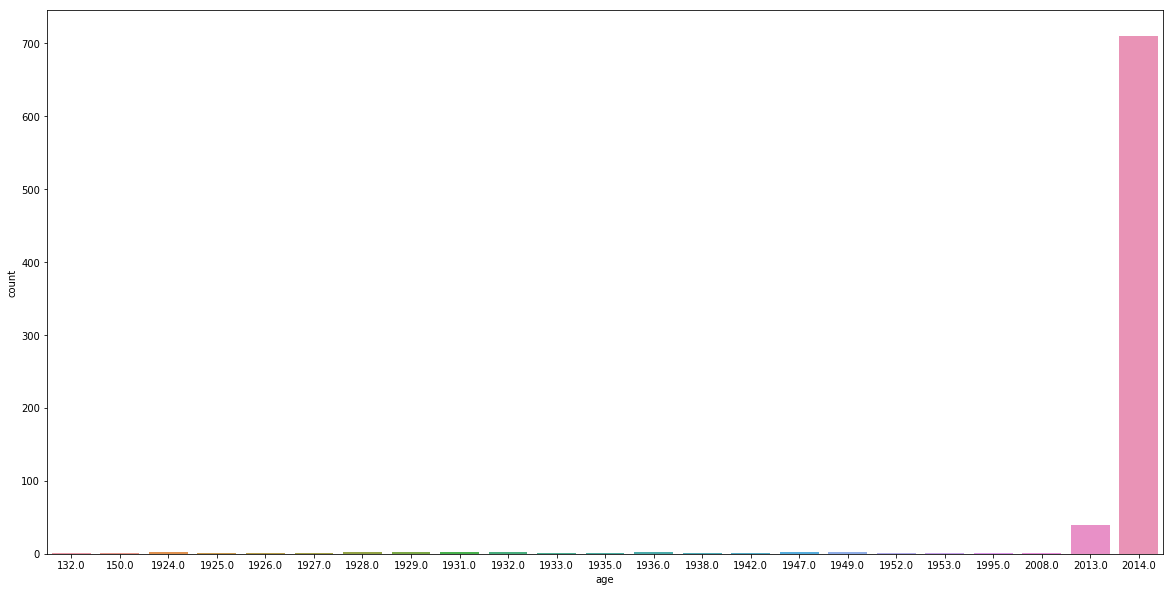

In [65]:
sns.countplot(x=raw_user[raw_user.age > 120].age)

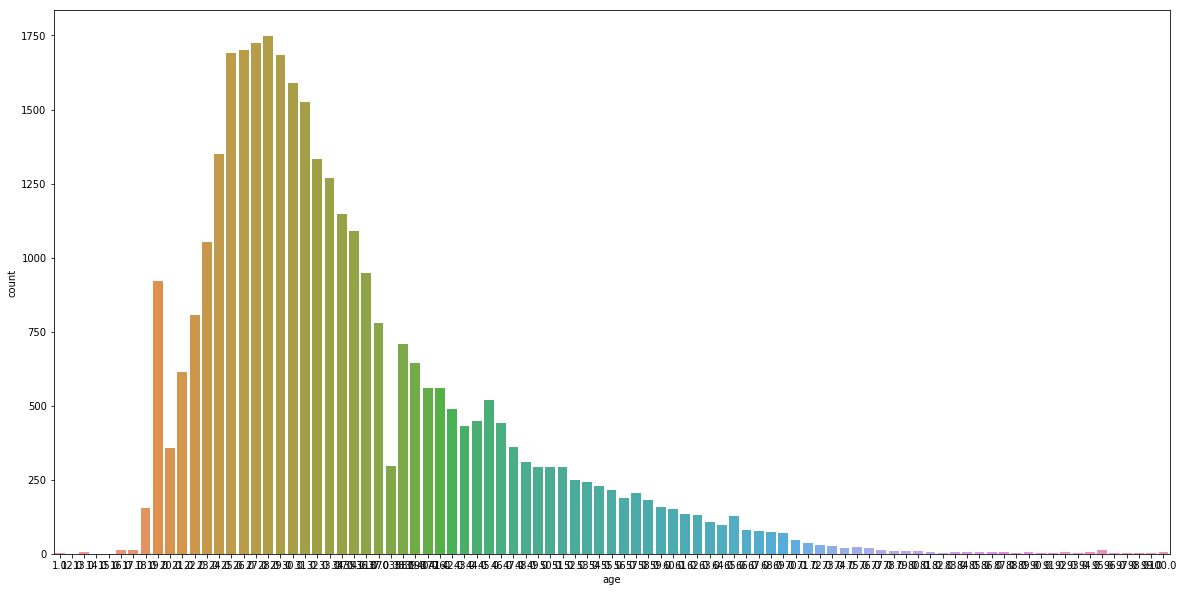

In [66]:
sns.countplot(x=raw_test_dataset.age.apply(age_func))

In [62]:
raw_test_dataset.age.apply(age_func).describe().T

count    33220.000000
mean        34.852980
std         13.245664
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max        110.000000
Name: age, dtype: float64

In [67]:
raw_test_dataset.date_first_booking.dt.hour

AttributeError: Can only use .dt accessor with datetimelike values